In [4]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv(r'C:\Users\Kashi\Downloads\SalaryData_Train(1).csv')
df1 = pd.read_csv(r'C:\Users\Kashi\Downloads\SalaryData_Test(1).csv')

In [6]:
data = pd.concat([df, df1], ignore_index=True)
data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
data.shape

(45221, 14)

In [9]:
df.shape

(30161, 14)

In [10]:
data.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [12]:
data = data.drop(['capitalloss', 'capitalgain'], axis = 1)

In [13]:
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame with categorical columns
categorical_columns = ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']

# Create a LabelEncoder object
le = LabelEncoder()

# Apply label encoding to each categorical column
for col in categorical_columns:
    data[col] = le.fit_transform(data[col])

In [14]:
data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,40,37,0
1,50,4,9,13,2,3,0,4,1,13,37,0
2,38,2,11,9,0,5,1,4,1,40,37,0
3,53,2,1,7,2,5,0,2,1,40,37,0
4,28,2,9,13,2,9,5,2,0,40,4,0


<AxesSubplot:>

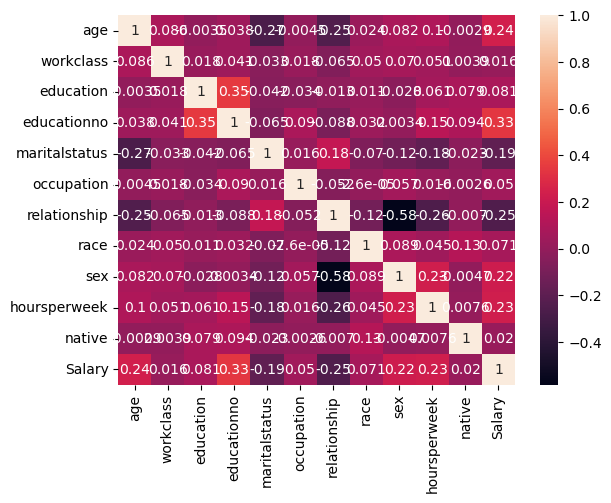

In [17]:
import seaborn as sns 
sns.heatmap(data.corr(), annot = True)

In [18]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


In [21]:
x = data.iloc[:,:11]
y = data['Salary']

In [24]:
model = LogisticRegression()
rfe = RFE(model)
fit = rfe.fit(x,y)

C:\Users\Kashi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Kashi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [25]:
fit.n_features_

5

In [26]:
fit.ranking_

array([3, 2, 5, 1, 1, 6, 1, 1, 1, 7, 4])

In [28]:
d = {'f': x.columns, "v":fit.ranking_}
imp = pd.DataFrame(d)
imp.sort_values('v', ascending=True, inplace = True)
imp

,f,v
3,educationno,1
4,maritalstatus,1
6,relationship,1
7,race,1
8,sex,1
1,workclass,2
0,age,3
10,native,4
2,education,5
5,occupation,6


In [30]:
X = data[['educationno','maritalstatus','race','sex','workclass']]
Y = data['Salary']

In [31]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 42)

In [33]:
from sklearn.naive_bayes import MultinomialNB as mb
clf = mb()

In [34]:
clf.fit(X_train,Y_train)
y_pred = clf.predict(X_test)

In [35]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [38]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.99      0.86     10238
           1       0.34      0.02      0.04      3329

    accuracy                           0.75     13567
   macro avg       0.55      0.50      0.45     13567
weighted avg       0.66      0.75      0.66     13567



In [40]:
#results without performing rfe 
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3, random_state = 43)
clf.fit(x_train,y_train)
ypred = clf.predict(x_test)

In [41]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.86      0.78      0.82     10239
           1       0.47      0.62      0.54      3328

    accuracy                           0.74     13567
   macro avg       0.67      0.70      0.68     13567
weighted avg       0.77      0.74      0.75     13567



In [42]:
#feature engineering using decision trees 
from sklearn.tree import DecisionTreeClassifier 

model = DecisionTreeClassifier()
model.fit(x,y)
print(model.feature_importances_)

[0.2235052  0.06155303 0.01926138 0.15308847 0.0176996  0.0936848
 0.24308972 0.02511223 0.00664345 0.13076648 0.02559564]


In [43]:
dt = {'f': x.columns, "v":model.feature_importances_}
f = pd.DataFrame(dt)
f.sort_values('v', ascending=False, inplace = True)
f

,f,v
6,relationship,0.243090
0,age,0.223505
3,educationno,0.153088
9,hoursperweek,0.130766
5,occupation,0.093685
1,workclass,0.061553
10,native,0.025596
7,race,0.025112
2,education,0.019261
4,maritalstatus,0.017700


In [46]:
x = data.iloc[:,[6,0,3,9]]
y = data['Salary']

In [48]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3, random_state = 43)
clf.fit(x_train,y_train)
ypred2 = clf.predict(x_test)

In [49]:
print(classification_report(y_test,ypred2))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85     10239
           1       0.55      0.52      0.54      3328

    accuracy                           0.78     13567
   macro avg       0.70      0.69      0.69     13567
weighted avg       0.77      0.78      0.77     13567

